In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import mne, re, os, pickle, shutil
import torch

from utils import *

In [2]:
ACTIVITY_PATH = '/home/williamtheodor/Documents/DL for EEG Classification/data/Activity/'

In [3]:
info_dict = {}

for high_pass in ['1.0', '4.0', '8.0', '12.0', '30.0']:
    info_dict[str(high_pass)] = {}

    for snr in ['5.0', '10.0', '50.0', '100.0']:
        info_dict[str(high_pass)][str(snr)] = {}

for file in os.listdir(ACTIVITY_PATH):

    high_pass = file.split('_')[2]
    low_pass = file.split('_')[3]
    snr = file.split('_')[4]
    time = file.split('_')[5]
    date = file.split('_')[6]

    info_dict[str(high_pass)][str(snr)] = {'time': time, 'date': date}

IndexError: list index out of range

In [ ]:
info_dict

In [4]:
def get_activity_dict(ACTIVITY_PATH, SNR, info_dict, PARCELLATION='HCPMMP1_combined', proj=False):

    def sort_dict(dict):
        return {k: dict[k] for k in sorted(dict.keys())}
    
    #delta_activity = np.load(ACTIVITY_PATH + PARCELLATION + '_1.0_4.0_' + str(SNR) + '_' + info_dict['1.0'][str(SNR)]['time'] + '_' + info_dict['1.0'][str(SNR)]['date'] + '_proj_test.npy', allow_pickle=True).item()
    #theta_activity = np.load(ACTIVITY_PATH + PARCELLATION + '_4.0_8.0_' + str(SNR) + '_' + info_dict['4.0'][str(SNR)]['time'] + '_' + info_dict['4.0'][str(SNR)]['date'] + '_proj_test.npy', allow_pickle=True).item()
    #alpha_activity = np.load(ACTIVITY_PATH + PARCELLATION + '_8.0_12.0_' + str(SNR) + '_' + info_dict['8.0'][str(SNR)]['time'] + '_' + info_dict['8.0'][str(SNR)]['date'] + '_proj_test.npy', allow_pickle=True).item()
    #beta_activity = np.load(ACTIVITY_PATH + PARCELLATION + '_12.0_30.0_' + str(SNR) + '_' + info_dict['12.0'][str(SNR)]['time'] + '_' + info_dict['12.0'][str(SNR)]['date'] + '_proj_test.npy', allow_pickle=True).item()
    #gamma_activity = np.load(ACTIVITY_PATH + PARCELLATION + '_30.0_70.0_' + str(SNR) + '_' + info_dict['30.0'][str(SNR)]['time'] + '_' + info_dict['30.0'][str(SNR)]['date'] + '_proj_test.npy', allow_pickle=True).item()

    delta_activity = np.load(ACTIVITY_PATH + 'HCPMMP1_combined_1.0_4.0_213638_280423.npy', allow_pickle=True).item()
    theta_activity = np.load(ACTIVITY_PATH + 'HCPMMP1_combined_4.0_8.0_220344_280423.npy', allow_pickle=True).item()
    alpha_activity = np.load(ACTIVITY_PATH + 'HCPMMP1_combined_8.0_12.0_220503_280423.npy', allow_pickle=True).item()
    beta_activity = np.load(ACTIVITY_PATH + 'HCPMMP1_combined_12.0_30.0_222628_280423.npy', allow_pickle=True).item()
    gamma_activity = np.load(ACTIVITY_PATH + 'HCPMMP1_combined_30.0_70.0_225658_280423.npy', allow_pickle=True).item()

    activity_dict = {
        'Delta': sort_dict(delta_activity),
        'Theta': sort_dict(theta_activity),
        'Alpha': sort_dict(alpha_activity),
        'Beta': sort_dict(beta_activity),
        'Gamma': sort_dict(gamma_activity)
    }

    return activity_dict

In [8]:
PARCELLATION = 'HCPMMP1_combined'

SNR = 100.0

actvity_dict = get_activity_dict(ACTIVITY_PATH, SNR=SNR, info_dict=info_dict, proj=False)
bands = list(actvity_dict.keys())

subjects_dir, subject, trans, src_path, bem_path = get_fsaverage()
labels = get_labels(subjects_dir, parcellation_name=PARCELLATION)
label_names = [label.name for label in np.array(labels).flatten()]

In [9]:
activity_differences = np.zeros((len(bands), int(len(label_names)/2))) 

neutral_labels = np.unique([name[:-3] for name in label_names])

average_activity = np.array([np.array([actvity_dict[band][edf_file]['power']['T0'].mean(axis=0) for edf_file in actvity_dict[band].keys()]).mean(axis=0) for band in bands])

for i, band in enumerate(bands):
    for j in range(int(len(label_names)/2)):
        activity_differences[i][j] = np.abs(average_activity[i][j] - average_activity[i][j+23])

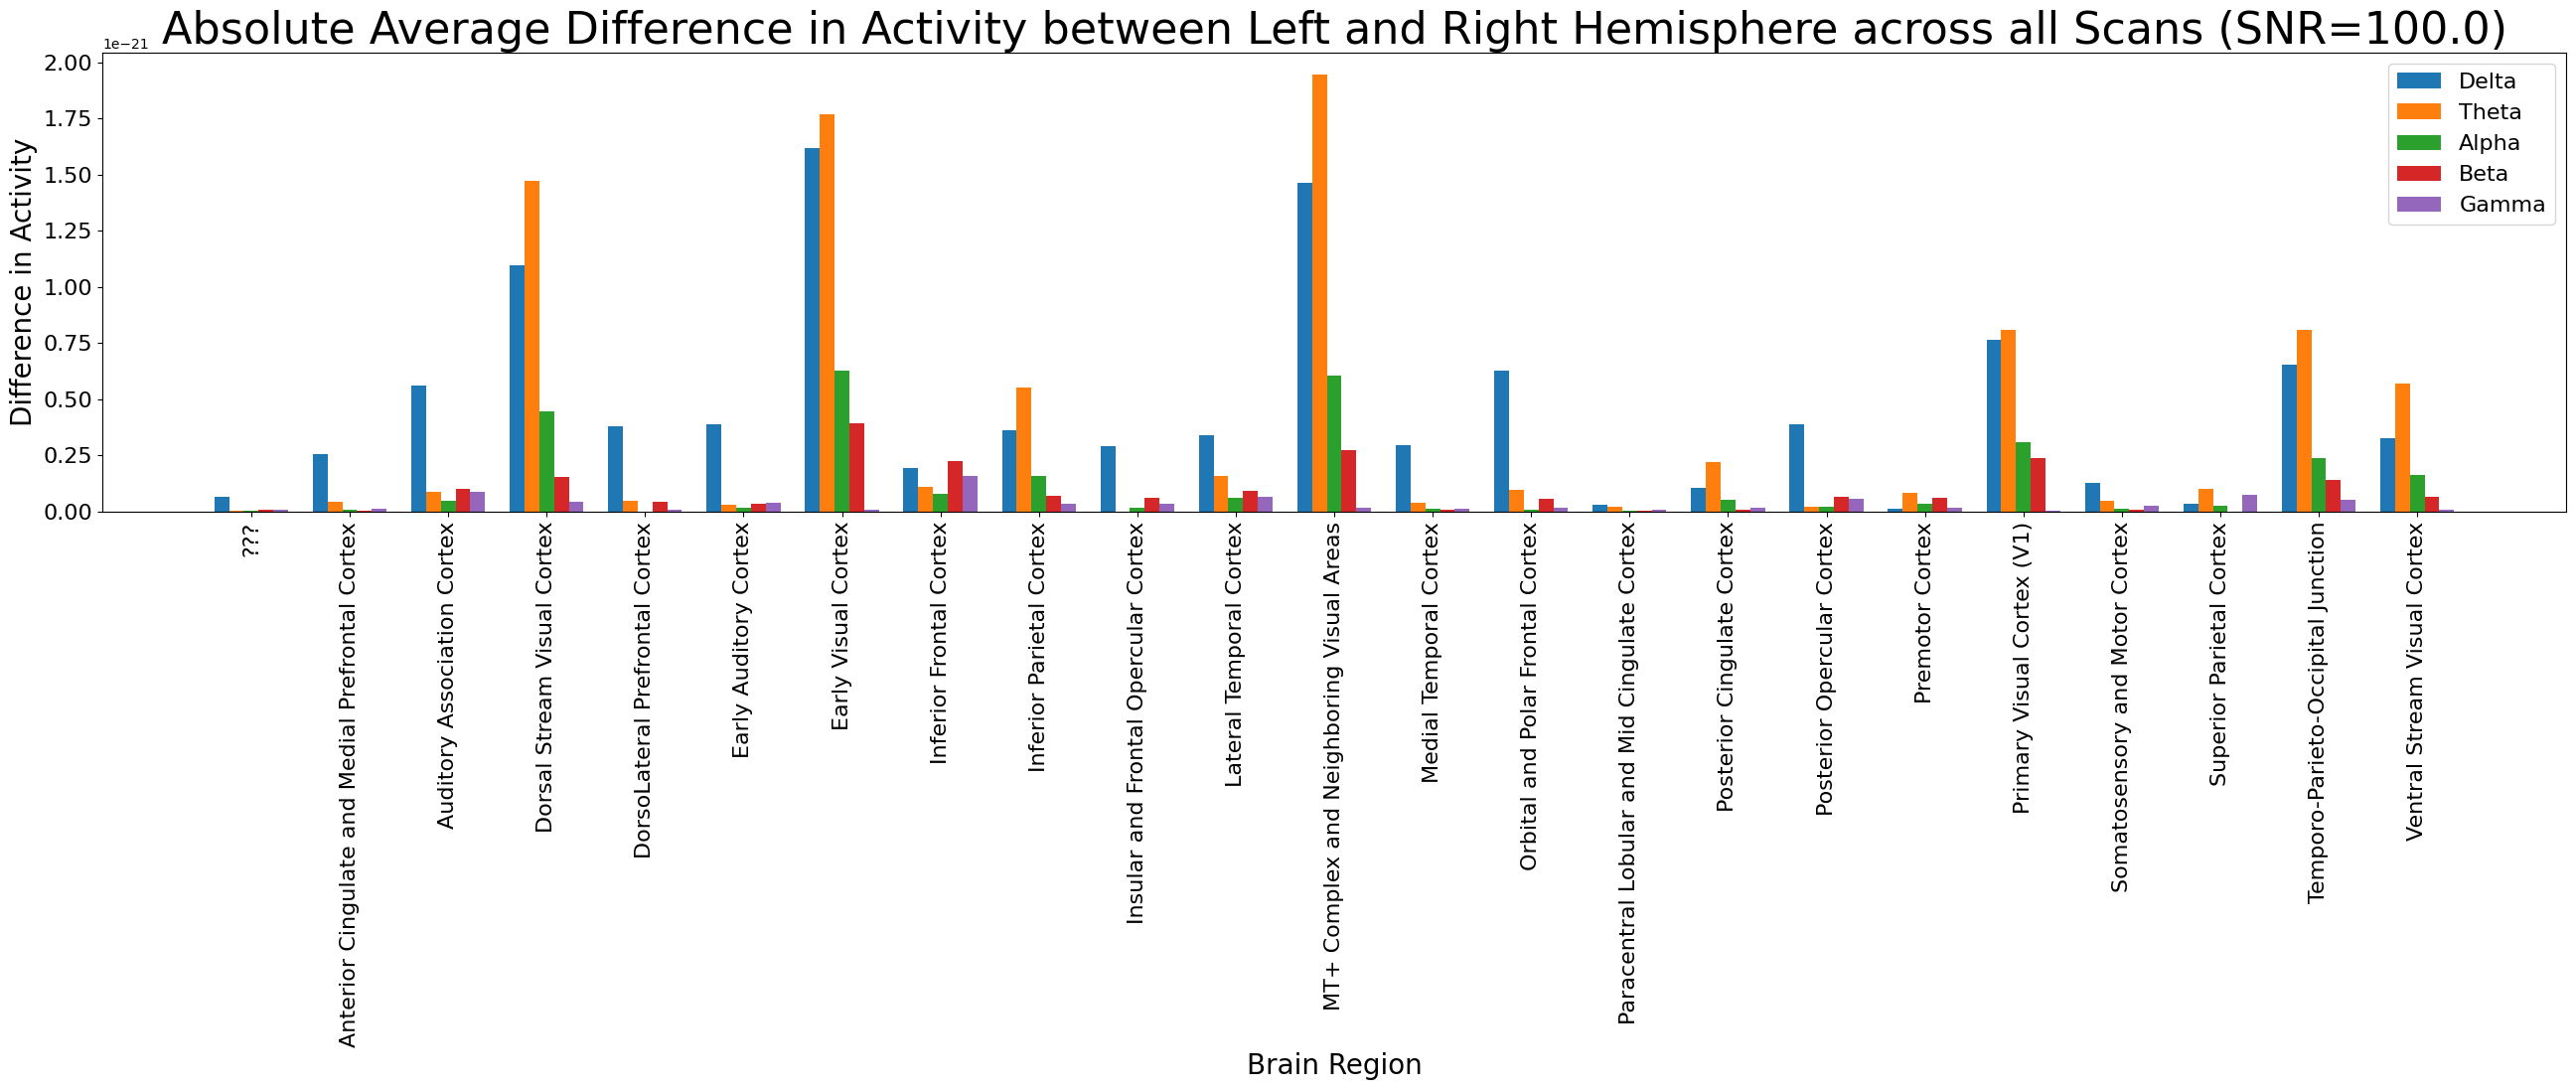

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random numpy array of shape (5,23)

# Create a bar plot with 23 groups of 5 bars each
fig, ax = plt.subplots(1, 1, figsize=(32, 6))
x = np.arange(23)
width = 0.15

adjust = [-2*width, -width, 0, width, 2*width]

for i in range(5):
    rects = ax.bar(x + adjust[i], activity_differences[i], width, label=f'{bands[i]}')

# Add axis labels and a title to the plot
ax.set_xlabel('Brain Region', fontsize=20)
ax.set_ylabel('Difference in Activity', fontsize=20)
ax.set_title(f'Absolute Average Difference in Activity between Left and Right Hemisphere across all Scans (SNR={SNR})', fontsize=32)

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(neutral_labels, rotation=90, fontsize=16)

ax.tick_params(axis='y', labelsize=16)



# Add a legend to the plot
ax.legend(fontsize=16)

# Show the plot
plt.show()